In [50]:
import sympy
import math 
import numpy as np
from scipy.optimize import fsolve
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import optimize

## Tsallis entropy 
#### The Tsallis entropy can be written in compact form 
$$
S_T = \gamma A^\delta
$$ 
#### where $A \propto L^2$ is the area of the system with characteristic lenght $L$. The parameters $\gamma$ and $\delta$ under the hypothesis of equal probabilities are related to the dimensionality of the system $d$, and specifically the important one is 
$$
\delta = \frac{d}{d-1}, \, \, \text{for} \,\, d > 1.
$$
#### In the case where $\delta = 1$ and $\gamma = 2 \pi M_p^2$, with $M_p$ the Planck mass, we obtain the usual additive entropy. 
### Tsallis holographic dark energy 
#### We consider a flat homogeneous and isotropic Friedmann-Robertson-Walker universe, in this case the horizon is 
$$
\int_{x}^{ \infty} \frac{dx}{Ha} = \frac{1}{a} \left( \frac{B}{3 M^2 H^2 \Omega_{DE}} \right)^{\frac{1}{4-2\delta}}. 
$$
#### In this model the evolution of the dark energy is given by the equation 
$$
{\Omega'}_{DE} = \Omega_{DE} \left( 1 - \Omega \right) \left( 2 \delta -1 +  Q\left(1 - \Omega_{DE} \right)^{\frac{1-\delta}{2(2-\delta)}} (\Omega_{DE})^{\frac{1}{2(2-\delta)} } e^{\frac{3(1-\delta)}{2(2-\delta)}x} \right)
$$
#### where 
$$
Q = 2 (2 - \delta) \left( \frac{B}{3 M_p^2 }\right)^{\frac{1}{2(\delta - 2 )}} \left( H_0 \sqrt{\Omega_{m0}} \right)^{\frac{1-\delta}{\delta-2}}
$$
#### 

In [51]:
#Right hand side of the equations
B = [0.001,0.01,0.02,0.05,0.08]
H0 = 70 
Om0 = 0.3
def tsallis_model0(Omega,x, d=0.9):
    Q = 2*(2-d)*( (B[0]/3)**(1./(2*(d-2))) )*( H0*np.sqrt(Om0) )**((1-d)/(d-2))
    dOmega = Omega*(1-Omega)*( 1*d - 1 + Q*((1-Omega)**((1-d)/(2*(2-d))))*(Omega*(1./(2*(2-d))))*np.exp((3*(1-d)/(2*(2-d)))*x ) )
    return dOmega

def tsallis_model1(Omega,x, d=0.9):
    Q = 2*(2-d)*( (B[1]/3)**(1./(2*(d-2))) )*( H0*np.sqrt(Om0) )**((1-d)/(d-2))
    dOmega = Omega*(1-Omega)*( 1*d - 1 + Q*((1-Omega)**((1-d)/(2*(2-d))))*(Omega*(1./(2*(2-d))))*np.exp((3*(1-d)/(2*(2-d)))*x ) )
    return dOmega


def tsallis_model2(Omega,x, d=0.9):
    Q = 2*(2-d)*( (B[2]/3)**(1./(2*(d-2))) )*( H0*np.sqrt(Om0) )**((1-d)/(d-2))
    dOmega = Omega*(1-Omega)*( 1*d - 1 + Q*((1-Omega)**((1-d)/(2*(2-d))))*(Omega*(1./(2*(2-d))))*np.exp((3*(1-d)/(2*(2-d)))*x ) )
    return dOmega

def tsallis_model3(Omega,x, d=0.9):
    Q = 2*(2-d)*( (B[3]/3)**(1./(2*(d-2))) )*( H0*np.sqrt(Om0) )**((1-d)/(d-2))
    dOmega = Omega*(1-Omega)*( 1*d - 1 + Q*((1-Omega)**((1-d)/(2*(2-d))))*(Omega*(1./(2*(2-d))))*np.exp((3*(1-d)/(2*(2-d)))*x ) )
    return dOmega

def tsallis_model4(Omega,x, d=0.9):
    Q = 2*(2-d)*( (B[4]/3)**(1./(2*(d-2))) )*( H0*np.sqrt(Om0) )**((1-d)/(d-2))
    dOmega = Omega*(1-Omega)*( 1*d - 1 + Q*((1-Omega)**((1-d)/(2*(2-d))))*(Omega*(1./(2*(2-d))))*np.exp((3*(1-d)/(2*(2-d)))*x ) )
    return dOmega


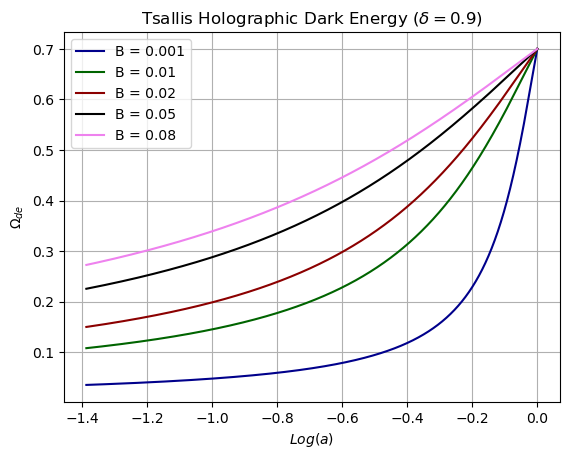

In [52]:
Om0 = 0.7 
x0 = np.log(1./(1+3))
xf = 0.00001
loga = np.linspace(xf,x0,5000)


sol_tsallis = [odeint(tsallis_model0,Om0,loga),odeint(tsallis_model1,Om0,loga),odeint(tsallis_model2,Om0,loga),odeint(tsallis_model3,Om0,loga),odeint(tsallis_model4,Om0,loga)]

plt.plot(loga,sol_tsallis[0],color='darkblue',label='B = 0.001')
plt.plot(loga,sol_tsallis[1],color='darkgreen',label='B = 0.01')
plt.plot(loga,sol_tsallis[2],color='darkred',label='B = 0.02')
plt.plot(loga,sol_tsallis[3],color='black',label='B = 0.05')
plt.plot(loga,sol_tsallis[4],color='violet',label='B = 0.08')
plt.legend()
plt.title('Tsallis Holographic Dark Energy ($\delta = 0.9$)')
plt.ylabel('$\Omega_{de}$')
plt.xlabel('$Log(a)$')
plt.grid()
